In [1]:
import pandas as pd
import numpy as np

In [23]:
#read shapefiles of NYC zip codes
import geopandas as gpd
NYCcensus=gpd.read_file("https://services5.arcgis.com/GfwWNkhOj9bNBqoJ/arcgis/rest/services/NYC_Census_Tracts_for_2020_US_Census/FeatureServer/0/query?where=1=1&outFields=*&outSR=4326&f=pgeojson")
NYCcensus

OBJECTID CTLabel BoroCode       BoroName  CT2020 BoroCT2020 CDEligibil  \
0            1       1        1      Manhattan  000100    1000100       None   
1            2    2.01        1      Manhattan  000201    1000201       None   
2            3    2.02        1      Manhattan  000202    1000202       None   
3            4       5        1      Manhattan  000500    1000500       None   
4            5       6        1      Manhattan  000600    1000600       None   
...        ...     ...      ...            ...     ...        ...        ...   
2320      2321  303.02        5  Staten Island  030302    5030302       None   
2321      2322  319.01        5  Staten Island  031901    5031901       None   
2322      2323  319.02        5  Staten Island  031902    5031902       None   
2323      2324     323        5  Staten Island  032300    5032300       None   
2324      2325    9901        5  Staten Island  990100    5990100       None   

                                                NTAName NTA2020 CDTA2020  \
0     The Battery-Governors Island-Ellis Island-Libe...  MN0191     MN01   
1                                 Chinatown-Two Bridges  MN0301     MN03   
2                                       Lower East Side  MN0302     MN03   
3     The Battery-Governors Island-Ellis Island-Libe...  MN0191     MN01   
4                                 Chinatown-Two Bridges  MN0301     MN03   
...                                                 ...     ...      ...   
2320            Mariner's Harbor-Arlington-Graniteville  SI0107     SI01   
2321            Mariner's Harbor-Arlington-Graniteville  SI0107     SI01   
2322            Mariner's Harbor-Arlington-Graniteville  SI0107     SI01   
2323            Mariner's Harbor-Arlington-Graniteville  SI0107     SI01   
2324                        Hoffman & Swinburne Islands  SI9591     SI95   

                                               CDTANAME        GEOID  \
0     MN01 Financial District-Tribeca (CD 1 Equivalent)  36061000100   
1      MN03 Lower East Side-Chinatown (CD 3 Equivalent)  36061000201   
2      MN03 Lower East Side-Chinatown (CD 3 Equivalent)  36061000202   
3     MN01 Financial District-Tribeca (CD 1 Equivalent)  36061000500   
4      MN03 Lower East Side-Chinatown (CD 3 Equivalent)  36061000600   
...                                                 ...          ...   
2320                 SI01 North Shore (CD 1 Equivalent)  36085030302   
2321                 SI01 North Shore (CD 1 Equivalent)  36085031901   
2322                 SI01 North Shore (CD 1 Equivalent)  36085031902   
2323                 SI01 North Shore (CD 1 Equivalent)  36085032300   
2324  SI95 Great Kills Park-Fort Wadsworth (JIA 95 A...  36085990100   

       Shape__Area  Shape__Length  \
0     1.844391e+06   11022.881944   
1     9.723121e+05    4754.494868   
2     3.315114e+06    8568.089568   
3     9.083181e+06   32641.900715   
4     2.582705e+06    6976.286329   
...            ...            ...   
2320  9.788187e+06   13923.063210   
2321  4.126613e+06    8255.013622   
2322  7.005078e+06   16958.325307   
2323  4.162499e+07   38242.743701   
2324  6.357020e+05    4743.128085   

                                               geometry  
0     MULTIPOLYGON (((-74.04388 40.69020, -74.04351 ...  
1     POLYGON ((-73.98450 40.70952, -73.98655 40.709...  
2     MULTIPOLYGON (((-73.98364 40.70960, -73.98450 ...  
3     MULTIPOLYGON (((-74.01093 40.68450, -74.01193 ...  
4     POLYGON ((-73.99022 40.71441, -73.98934 40.714...  
...                                                 ...  
2320  POLYGON ((-74.16050 40.62654, -74.16025 40.626...  
2321  POLYGON ((-74.16050 40.62654, -74.16118 40.626...  
2322  POLYGON ((-74.16035 40.63845, -74.16024 40.638...  
2323  POLYGON ((-74.17119 40.64175, -74.17129 40.640...  
2324  MULTIPOLYGON (((-74.05314 40.57771, -74.05406 ...  

[2325 rows x 15 columns]

In [103]:
NYCcensus_exp = NYCcensus.explode()
NYCcensus_exp

OBJECTID CTLabel BoroCode       BoroName  CT2020 BoroCT2020  \
0    0         1       1        1      Manhattan  000100    1000100   
     1         1       1        1      Manhattan  000100    1000100   
1    0         2    2.01        1      Manhattan  000201    1000201   
2    0         3    2.02        1      Manhattan  000202    1000202   
     1         3    2.02        1      Manhattan  000202    1000202   
...          ...     ...      ...            ...     ...        ...   
2321 0      2322  319.01        5  Staten Island  031901    5031901   
2322 0      2323  319.02        5  Staten Island  031902    5031902   
2323 0      2324     323        5  Staten Island  032300    5032300   
2324 0      2325    9901        5  Staten Island  990100    5990100   
     1      2325    9901        5  Staten Island  990100    5990100   

       CDEligibil                                            NTAName NTA2020  \
0    0       None  The Battery-Governors Island-Ellis Island-Libe...  MN0191   
     1       None  The Battery-Governors Island-Ellis Island-Libe...  MN0191   
1    0       None                              Chinatown-Two Bridges  MN0301   
2    0       None                                    Lower East Side  MN0302   
     1       None                                    Lower East Side  MN0302   
...           ...                                                ...     ...   
2321 0       None            Mariner's Harbor-Arlington-Graniteville  SI0107   
2322 0       None            Mariner's Harbor-Arlington-Graniteville  SI0107   
2323 0       None            Mariner's Harbor-Arlington-Graniteville  SI0107   
2324 0       None                        Hoffman & Swinburne Islands  SI9591   
     1       None                        Hoffman & Swinburne Islands  SI9591   

       CDTA2020                                           CDTANAME  \
0    0     MN01  MN01 Financial District-Tribeca (CD 1 Equivalent)   
     1     MN01  MN01 Financial District-Tribeca (CD 1 Equivalent)   
1    0     MN03   MN03 Lower East Side-Chinatown (CD 3 Equivalent)   
2    0     MN03   MN03 Lower East Side-Chinatown (CD 3 Equivalent)   
     1     MN03   MN03 Lower East Side-Chinatown (CD 3 Equivalent)   
...         ...                                                ...   
2321 0     SI01                 SI01 North Shore (CD 1 Equivalent)   
2322 0     SI01                 SI01 North Shore (CD 1 Equivalent)   
2323 0     SI01                 SI01 North Shore (CD 1 Equivalent)   
2324 0     SI95  SI95 Great Kills Park-Fort Wadsworth (JIA 95 A...   
     1     SI95  SI95 Great Kills Park-Fort Wadsworth (JIA 95 A...   

              GEOID   Shape__Area  Shape__Length  \
0    0  36061000100  1.844391e+06   11022.881944   
     1  36061000100  1.844391e+06   11022.881944   
1    0  36061000201  9.723121e+05    4754.494868   
2    0  36061000202  3.315114e+06    8568.089568   
     1  36061000202  3.315114e+06    8568.089568   
...             ...           ...            ...   
2321 0  36085031901  4.126613e+06    8255.013622   
2322 0  36085031902  7.005078e+06   16958.325307   
2323 0  36085032300  4.162499e+07   38242.743701   
2324 0  36085990100  6.357020e+05    4743.128085   
     1  36085990100  6.357020e+05    4743.128085   

                                                 geometry  
0    0  POLYGON ((-74.04388 40.69020, -74.04351 40.689...  
     1  POLYGON ((-74.03995 40.70090, -74.03945 40.700...  
1    0  POLYGON ((-73.98450 40.70952, -73.98655 40.709...  
2    0  POLYGON ((-73.98364 40.70960, -73.98450 40.709...  
     1  POLYGON ((-73.98237 40.70555, -73.98246 40.705...  
...                                                   ...  
2321 0  POLYGON ((-74.16050 40.62654, -74.16118 40.626...  
2322 0  POLYGON ((-74.16035 40.63845, -74.16024 40.638...  
2323 0  POLYGON ((-74.17119 40.64175, -74.17129 40.640...  
2324 0  POLYGON ((-74.05314 40.57771, -74.05406 40.577...  
     1  POLYGON ((-74.05051 40.56643, -74.05047 40.566...  

[2468 r

<AxesSubplot:>

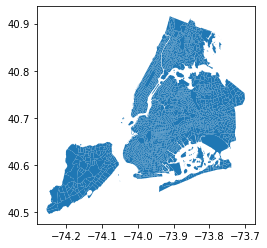

In [105]:
NYCcensus_exp.plot()

In [106]:
NYCcensus_exp['census_id'] = np.arange(len(NYCcensus_exp))
NYCcensus_exp

OBJECTID CTLabel BoroCode       BoroName  CT2020 BoroCT2020  \
0    0         1       1        1      Manhattan  000100    1000100   
     1         1       1        1      Manhattan  000100    1000100   
1    0         2    2.01        1      Manhattan  000201    1000201   
2    0         3    2.02        1      Manhattan  000202    1000202   
     1         3    2.02        1      Manhattan  000202    1000202   
...          ...     ...      ...            ...     ...        ...   
2321 0      2322  319.01        5  Staten Island  031901    5031901   
2322 0      2323  319.02        5  Staten Island  031902    5031902   
2323 0      2324     323        5  Staten Island  032300    5032300   
2324 0      2325    9901        5  Staten Island  990100    5990100   
     1      2325    9901        5  Staten Island  990100    5990100   

       CDEligibil                                            NTAName NTA2020  \
0    0       None  The Battery-Governors Island-Ellis Island-Libe...  MN0191   
     1       None  The Battery-Governors Island-Ellis Island-Libe...  MN0191   
1    0       None                              Chinatown-Two Bridges  MN0301   
2    0       None                                    Lower East Side  MN0302   
     1       None                                    Lower East Side  MN0302   
...           ...                                                ...     ...   
2321 0       None            Mariner's Harbor-Arlington-Graniteville  SI0107   
2322 0       None            Mariner's Harbor-Arlington-Graniteville  SI0107   
2323 0       None            Mariner's Harbor-Arlington-Graniteville  SI0107   
2324 0       None                        Hoffman & Swinburne Islands  SI9591   
     1       None                        Hoffman & Swinburne Islands  SI9591   

       CDTA2020                                           CDTANAME  \
0    0     MN01  MN01 Financial District-Tribeca (CD 1 Equivalent)   
     1     MN01  MN01 Financial District-Tribeca (CD 1 Equivalent)   
1    0     MN03   MN03 Lower East Side-Chinatown (CD 3 Equivalent)   
2    0     MN03   MN03 Lower East Side-Chinatown (CD 3 Equivalent)   
     1     MN03   MN03 Lower East Side-Chinatown (CD 3 Equivalent)   
...         ...                                                ...   
2321 0     SI01                 SI01 North Shore (CD 1 Equivalent)   
2322 0     SI01                 SI01 North Shore (CD 1 Equivalent)   
2323 0     SI01                 SI01 North Shore (CD 1 Equivalent)   
2324 0     SI95  SI95 Great Kills Park-Fort Wadsworth (JIA 95 A...   
     1     SI95  SI95 Great Kills Park-Fort Wadsworth (JIA 95 A...   

              GEOID   Shape__Area  Shape__Length  \
0    0  36061000100  1.844391e+06   11022.881944   
     1  36061000100  1.844391e+06   11022.881944   
1    0  36061000201  9.723121e+05    4754.494868   
2    0  36061000202  3.315114e+06    8568.089568   
     1  36061000202  3.315114e+06    8568.089568   
...             ...           ...            ...   
2321 0  36085031901  4.126613e+06    8255.013622   
2322 0  36085031902  7.005078e+06   16958.325307   
2323 0  36085032300  4.162499e+07   38242.743701   
2324 0  36085990100  6.357020e+05    4743.128085   
     1  36085990100  6.357020e+05    4743.128085   

                                                 geometry  census_id  
0    0  POLYGON ((-74.04388 40.69020, -74.04351 40.689...          0  
     1  POLYGON ((-74.03995 40.70090, -74.03945 40.700...          1  
1    0  POLYGON ((-73.98450 40.70952, -73.98655 40.709...          2  
2    0  POLYGON ((-73.98364 40.70960, -73.98450 40.709...          3  
     1  POLYGON ((-73.98237 40.70555, -73.98246 40.705...          4  
...                                                   ...        ...  
2321 0  POLYGON ((-74.16050 40.62654, -74.16118 40.626...       2463  
2322 0  POLYGON ((-74.16035 40.63845, -74.16024 40.638...       2464  
2323 0  POLYGON ((-74.17119 40.64175, -74.17129 40.640...       2465  
2324 0  POLYGON ((

In [110]:
json.dumps(shapely.geometry.mapping(NYCcensus_exp))

'{"type": "FeatureCollection", "features": [{"id": "(0, 0)", "type": "Feature", "properties": {"BoroCT2020": "1000100", "BoroCode": "1", "BoroName": "Manhattan", "CDEligibil": null, "CDTA2020": "MN01", "CDTANAME": "MN01 Financial District-Tribeca (CD 1 Equivalent)", "CT2020": "000100", "CTLabel": "1", "GEOID": "36061000100", "NTA2020": "MN0191", "NTAName": "The Battery-Governors Island-Ellis Island-Liberty Island", "OBJECTID": 1, "Shape__Area": 1844391.02693176, "Shape__Length": 11022.8819440345, "census_id": 0}, "geometry": {"type": "Polygon", "coordinates": [[[-74.0438790753777, 40.6901959259204], [-74.0435074200325, 40.6896956102497], [-74.0427367980852, 40.690058442175], [-74.0427857930038, 40.690129227743], [-74.0427057430949, 40.6901634553793], [-74.04255517865, 40.6899710101874], [-74.0426407529679, 40.6899364267062], [-74.0426952666689, 40.6900055100991], [-74.0434689823505, 40.6896452410428], [-74.0435178321195, 40.6891992837514], [-74.0436422451677, 40.6887748101512], [-74.04

In [168]:
NYCcensus_exp.to_file("NYCcensus_exploded.json", driver="GeoJSON")